# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=fbe6c241ce1124c53864dd374fa54754bd60115b98823e1112ad586a884e4344
  Stored in directory: /Users/m1nsun9/Library/Caches/pip/wheels/eb/07/14/1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [62]:
import pandas as pd
import json
import requests
import random as rand
import matplotlib.pyplot as plt
from api_keys import weather_api_key
from citipy import citipy
from scipy.stats import linregress

base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [9]:
city_list = []

# create random geo-coordinates and use citipy to gather city names onto a list
for i in range(0, 550):
    city = citipy.nearest_city(rand.uniform(-90, 90), rand.uniform(-180, 180))
    
    # create while loop that re-rolls geo-coordinates for a city that isn't already in list
    while city.city_name in city_list:
        city = citipy.nearest_city(rand.uniform(-90, 90), rand.uniform(-180, 180))
    city_list.append(city.city_name)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
city_data = {
    'City': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': [],
    'Date': []
}

print('Beginning Data Retrieval')
print('-----------------------------')


# iterate through city list and get API response and try to add information from each city into df dictionary
for i in range(len(city_list)):
    set_no = ((i + 1) // 50) + 1
    query_url = f"{base_url}q={city_list[i]}&appid={weather_api_key}&units=imperial"

    try:
        response = requests.get(query_url).json()
        city_data['City'].append(response['name'])
        city_data['Lat'].append(response['coord']['lat'])
        city_data['Lng'].append(response['coord']['lon'])
        city_data['Max Temp'].append(response['main']['temp_max'])
        city_data['Humidity'].append(response['main']['humidity'])
        city_data['Cloudiness'].append(response['clouds']['all'])
        city_data['Wind Speed'].append(response['wind']['speed'])
        city_data['Country'].append(response['sys']['country'])
        city_data['Date'].append(response['dt'])
        print(f"Processing Record {(i + 1) % 50} of Set {set_no} | {city_list[i]}")
    except KeyError:
        print('City not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | maarianhamina
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | adrar
Processing Record 10 of Set 1 | daru
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | coahuayana
Processing Record 20 of Set 1 | umea
City not found. Skipping...
Processing Record 22 of Set 1 | tara
Processing Record 23 of Set 1 | beringovskiy
Processing Record 24 of Set 1 | her

Processing Record 6 of Set 5 | encruzilhada do sul
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | balikpapan
City not found. Skipping...
Processing Record 11 of Set 5 | altamirano
Processing Record 12 of Set 5 | yarke pole
Processing Record 13 of Set 5 | roald
Processing Record 14 of Set 5 | mar del plata
Processing Record 15 of Set 5 | severo-kurilsk
Processing Record 16 of Set 5 | tibati
Processing Record 17 of Set 5 | qui nhon
Processing Record 18 of Set 5 | meadow lake
Processing Record 19 of Set 5 | alta floresta
Processing Record 20 of Set 5 | naze
Processing Record 21 of Set 5 | nioro
Processing Record 22 of Set 5 | vanimo
Processing Record 23 of Set 5 | lebu
City not found. Skipping...
Processing Record 25 of Set 5 | tucuman
Processing Record 26 of Set 5 | honningsvag
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 5 | kaduy
Processing Record 30 of Set 5 | truckee
Processing Recor

Processing Record 12 of Set 9 | bethel
Processing Record 13 of Set 9 | necochea
Processing Record 14 of Set 9 | shelburne
Processing Record 15 of Set 9 | takefu
Processing Record 16 of Set 9 | vila velha
Processing Record 17 of Set 9 | messina
Processing Record 18 of Set 9 | hami
Processing Record 19 of Set 9 | otane
Processing Record 20 of Set 9 | maceio
Processing Record 21 of Set 9 | iroquois falls
Processing Record 22 of Set 9 | araouane
Processing Record 23 of Set 9 | bajram curri
Processing Record 24 of Set 9 | iracoubo
Processing Record 25 of Set 9 | vardo
Processing Record 26 of Set 9 | arraial do cabo
Processing Record 27 of Set 9 | shubarshi
Processing Record 28 of Set 9 | parana
Processing Record 29 of Set 9 | sabang
Processing Record 30 of Set 9 | babu
Processing Record 31 of Set 9 | san jose
Processing Record 32 of Set 9 | norfolk
Processing Record 33 of Set 9 | novoagansk
Processing Record 34 of Set 9 | preobrazheniye
Processing Record 35 of Set 9 | candido mendes
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
city_df = pd.DataFrame(city_data)

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,17.60,67,1,19.46,US,1602917978
1,Port Lincoln,-34.73,135.87,55.38,69,83,14.56,AU,1602917978
2,Puerto Ayora,-0.74,-90.35,70.00,92,99,8.99,EC,1602917978
3,Butaritari,3.07,172.79,82.58,74,87,11.14,KI,1602917979
4,Vaini,-21.20,-175.20,73.40,100,90,11.41,TO,1602917979


In [45]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,5.080000e+02
mean,20.900551,16.023484,60.465217,71.836614,52.509843,7.965177,1.602918e+09
std,33.977909,92.705610,20.215274,22.663538,41.385401,5.628350,6.568431e+01
min,-54.800000,-175.200000,3.000000,10.000000,0.000000,0.270000,1.602918e+09
25%,-8.237500,-60.447500,45.982500,61.000000,1.000000,4.155000,1.602918e+09
50%,27.945000,18.585000,64.110000,78.000000,70.000000,6.930000,1.602918e+09
75%,48.455000,102.335000,77.000000,88.000000,94.000000,10.290000,1.602918e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,54.130000,1.602918e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
#  Get the indices of cities that have humidity over 100%.

humidity_indices = []

# if maximum humidity is greater than 100, add indices of cities with humidity greater than 100 to list
if city_df['Humidity'].max() > 100:
    # index through the cities
    for i in range(len(city_df.index)):
        # test for humidity level > 100 and append to list
        if city_df['Humidity'][i] > 100:
            humidity_indices.append(i)

In [47]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_df.drop(humidity_indices, inplace=False)

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,17.60,67,1,19.46,US,1602917978
1,Port Lincoln,-34.73,135.87,55.38,69,83,14.56,AU,1602917978
2,Puerto Ayora,-0.74,-90.35,70.00,92,99,8.99,EC,1602917978
3,Butaritari,3.07,172.79,82.58,74,87,11.14,KI,1602917979
4,Vaini,-21.20,-175.20,73.40,100,90,11.41,TO,1602917979


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

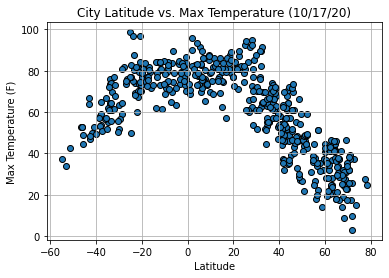

In [50]:
lat = clean_city_data[['Lat']]
temp = clean_city_data[['Max Temp']]

plt.scatter(lat, temp, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/17/20)')
plt.show()

## Latitude vs. Humidity Plot

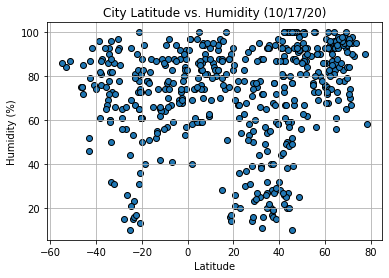

In [53]:
lat = clean_city_data[['Lat']]
hum = clean_city_data[['Humidity']]

plt.scatter(lat, hum, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/17/20)')
plt.show()

## Latitude vs. Cloudiness Plot

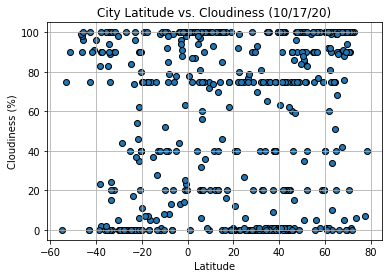

In [54]:
lat = clean_city_data[['Lat']]
cloud = clean_city_data[['Cloudiness']]

plt.scatter(lat, cloud, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/17/20)')
plt.show()

## Latitude vs. Wind Speed Plot

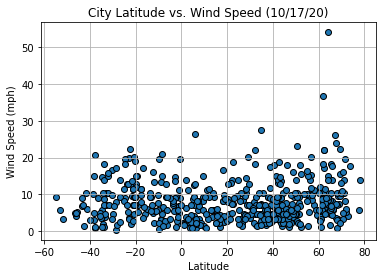

In [55]:
lat = clean_city_data[['Lat']]
wind = clean_city_data[['Wind Speed']]

plt.scatter(lat, wind, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/17/20)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8685338230675251


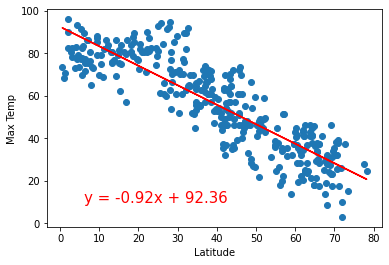

In [75]:
north_hem_df = clean_city_data.loc[clean_city_data['Lat'] > 0]

lat = north_hem_df['Lat']
temp = north_hem_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, temp)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


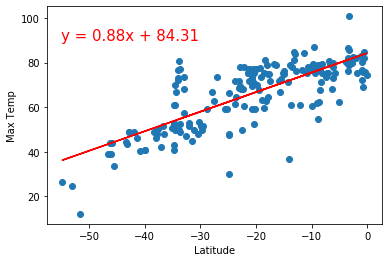

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


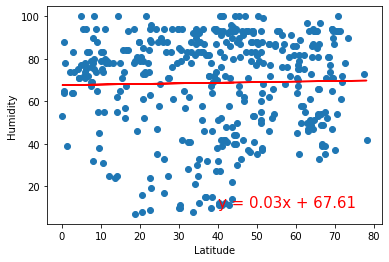

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


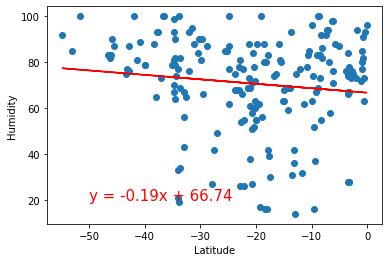

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


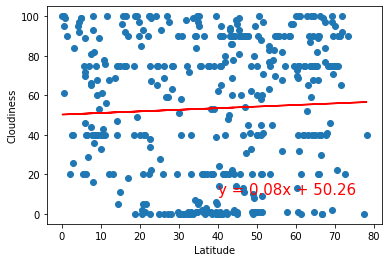

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


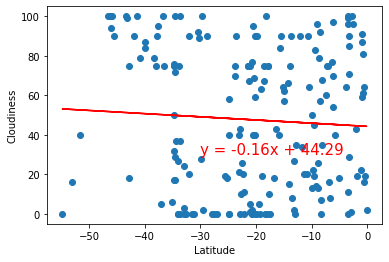

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


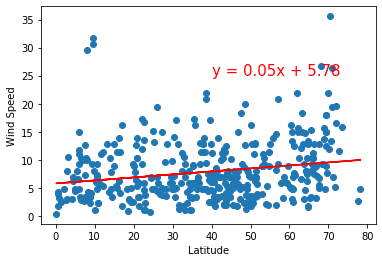

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


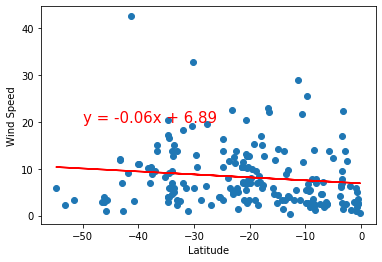